In [1]:
import pandas as pd
import numpy as np

In [21]:
# for reproducing results
np.random.seed(5)

In [22]:
base_dir = 'archive(3)/'
df_books = pd.read_csv(base_dir + 'Books.csv', low_memory=False)
df_users = pd.read_csv(base_dir + 'Users.csv', low_memory=False)
df_ratings = pd.read_csv(base_dir + 'Ratings.csv', low_memory=False)

In [23]:
from transformers import BertModel, BertTokenizer
import torch

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

def get_token_embeddings(title):
    #inputs = tokenizer(title, return_tensors='pt', truncation=True, padding='max_length', max_length=128)
    inputs = tokenizer(title, return_tensors='pt', truncation=True, padding=False, max_length=128)
    
    with torch.no_grad():    
        outputs = bert_model(**inputs)
    token_embeddings = outputs.last_hidden_state
    
    cls_embedding = token_embeddings[:, 0, :].squeeze()

    return cls_embedding.detach().numpy()    
    

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [24]:
#df_books['bert_embedding'] = df_books['Book-Title'].apply(get_token_embeddings)

# just load pre-generated embeddings from disk instead of apply the function above
df_books = pd.read_csv(base_dir + 'Books_BERT.csv', low_memory=False)

In [25]:
def str_to_array(s):
    # Use np.fromstring to convert space-separated string to numpy array
    return np.fromstring(s[1:-1], sep=' ')  # Removing the square brackets and converting

df_books['bert_embedding'] = df_books['bert_embedding'].apply(str_to_array)

In [26]:
# saving to disk has already been done
#df_books.to_csv(base_dir + 'Books_BERT.csv', index=False)  

In [27]:
df_books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,bert_embedding
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,"[-0.349427313, -0.077641055, -0.582779765, 0.0..."
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"[-0.126430616, -0.00297956937, 0.0479346775, 0..."
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,"[-0.471610934, -0.170697629, -0.34934029, -0.0..."
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,"[-0.290165693, -0.222719684, -0.178367659, -0...."
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,"[-0.303634435, 0.0944819003, -0.611664474, 0.1..."
...,...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,"[0.046248693, 0.228592485, 0.0403047204, -0.07..."
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,"[-0.273968995, 0.17688486, -0.118169539, 0.056..."
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,"[-0.347485363, -0.502976298, -0.117890209, 0.0..."
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,"[-0.510810912, -0.122426197, -0.228332102, -0...."


In [28]:
df_users

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [29]:
df_ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


### Rating distribution

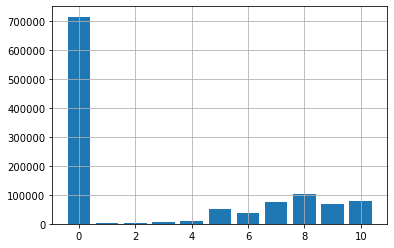

In [30]:
import matplotlib.pyplot as plt

valueCounts = df_ratings['Book-Rating'].value_counts().sort_index()
plt.bar(valueCounts.index, valueCounts.values)
plt.grid()


### Only consider implicit rating

In [31]:
df_ratings_impl = df_ratings[df_ratings['Book-Rating'] == 0].reset_index(drop=True)
del df_ratings_impl['Book-Rating']
df_ratings_impl

,User-ID,ISBN
0,276725,034545104X
1,276727,0446520802
2,276733,2080674722
3,276746,0425115801
4,276746,0449006522
...,...,...
716104,276704,059032120X
716105,276704,0679752714
716106,276704,080410526X
716107,276704,0876044011


### Negative sampling

In [32]:
sampledUsers = np.random.choice(df_users['User-ID'], size=(df_ratings_impl.shape[0],), replace=True)
sampledItems = np.random.choice(df_books['ISBN'], size=(df_ratings_impl.shape[0],), replace=True)

df_ratings_impl_neg = pd.DataFrame({'User-ID': sampledUsers, 
                                    'ISBN': sampledItems})

df_overlap = pd.merge(df_ratings_impl, df_ratings_impl_neg, on=['User-ID', 'ISBN'], how='inner')
df_overlap

,User-ID,ISBN
0,11676,0671816381
1,48494,0670820555
2,151086,0452277507
3,187487,0451190556
4,198711,0553562746
5,220278,0671020315
6,238120,043935806X
7,257204,0886770947
8,271538,0064471047


### Remove duplicates

In [33]:
df_ratings_impl_neg = df_ratings_impl_neg.append(df_overlap).reset_index(drop=True)
df_ratings_impl_neg['duplicated'] = df_ratings_impl_neg.duplicated(subset=['User-ID', 'ISBN'], keep=False)
print('No. removed duplicates: ', sum(df_ratings_impl_neg['duplicated']))
df_ratings_impl_neg = df_ratings_impl_neg[df_ratings_impl_neg['duplicated'] == False]
del df_ratings_impl_neg['duplicated']

No. removed duplicates:  24


### Create dataset

In [34]:
df_ratings_impl['label'] = 1
df_ratings_impl_neg['label'] = 0

df_ratings_impl = df_ratings_impl.append(df_ratings_impl_neg).reset_index(drop=True)
df_ratings_impl

,User-ID,ISBN,label
0,276725,034545104X,1
1,276727,0446520802,1
2,276733,2080674722,1
3,276746,0425115801,1
4,276746,0449006522,1
...,...,...,...
1432198,36360,0911226273,0
1432199,83564,2080105396,0
1432200,76316,0316171964,0
1432201,236563,2266079913,0


### Join user and item information

In [35]:
df = df_ratings_impl.merge(df_users, on='User-ID', how='inner')
df = df.merge(df_books, on='ISBN', how='inner')
df = df.reset_index(drop=True)

In [36]:
df

,User-ID,ISBN,label,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,bert_embedding
0,276725,034545104X,1,"tyler, texas, usa",NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"[-0.0820378512, -0.109257415, -0.252235651, -0..."
1,6543,034545104X,1,"strafford, missouri, usa",34.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"[-0.0820378512, -0.109257415, -0.252235651, -0..."
2,23768,034545104X,1,"st. louis, missouri, usa",45.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"[-0.0820378512, -0.109257415, -0.252235651, -0..."
3,28266,034545104X,1,"portland, oregon, usa",NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"[-0.0820378512, -0.109257415, -0.252235651, -0..."
4,28523,034545104X,1,"springfield, missouri, usa",24.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"[-0.0820378512, -0.109257415, -0.252235651, -0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363383,254796,0876122764,0,"frankenthal, rheinland-pfalz, greece",36.0,Where There Is Light: Insight and Inspiration ...,Yogananda,1989,Self-Realization Fellowship Publishers,http://images.amazon.com/images/P/0876122764.0...,http://images.amazon.com/images/P/0876122764.0...,http://images.amazon.com/images/P/0876122764.0...,"[-0.281222135, -0.359535635, -0.401328087, -0...."
1363384,31613,0671797638,0,"san francisco, california, usa",28.0,"Frommer's Walking Tours: Washington, D.C. (Fro...",Rena Bulkin,1993,John Wiley &amp; Sons,http://images.amazon.com/images/P/0671797638.0...,http://images.amazon.com/images/P/0671797638.0...,http://images.amazon.com/images/P/0671797638.0...,"[-0.511489749, -0.157164618, -0.425527215, -0...."
1363385,42234,0304350559,0,"centerville, ohio, usa",NaN,Cassell Military Classics: Last Stand!: Famous...,Bryan Perrett,1998,Sterling Publishing,http://images.amazon.com/images/P/0304350559.0...,http://images.amazon.com/images/P/0304350559.0...,http://images.amazon.com/images/P/0304350559.0...,"[-0.362609565, 0.159926116, 0.120314837, -0.28..."
1363386,209607,0879234768,0,"chatham, england, united kingdom",21.0,"War in Val D'Orcia: An Italian War Diary, 1943...",Iris Origo,1995,David R. Godine Publisher,http://images.amazon.com/images/P/0879234768.0...,http://images.amazon.com/images/P/0879234768.0...,http://images.amazon.com/images/P/0879234768.0...,"[-0.820212841, -0.0743936226, -0.345956117, -0..."


### Data types

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1363388 entries, 0 to 1363387
Data columns (total 13 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   User-ID              1363388 non-null  int64  
 1   ISBN                 1363388 non-null  object 
 2   label                1363388 non-null  int64  
 3   Location             1363388 non-null  object 
 4   Age                  915093 non-null   float64
 5   Book-Title           1363388 non-null  object 
 6   Book-Author          1363385 non-null  object 
 7   Year-Of-Publication  1363388 non-null  object 
 8   Publisher            1363381 non-null  object 
 9   Image-URL-S          1363388 non-null  object 
 10  Image-URL-M          1363388 non-null  object 
 11  Image-URL-L          1363380 non-null  object 
 12  bert_embedding       1363388 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 135.2+ MB


In [38]:
df['Year-Of-Publication'] = pd.to_numeric(df['Year-Of-Publication'], errors='coerce')

### No. NAs

In [39]:
df.isnull().sum(axis=0)

User-ID                     0
ISBN                        0
label                       0
Location                    0
Age                    448295
Book-Title                  0
Book-Author                 3
Year-Of-Publication         8
Publisher                   7
Image-URL-S                 0
Image-URL-M                 0
Image-URL-L                 8
bert_embedding              0
dtype: int64

### Shuffle data frame, train-test split

In [40]:
iSel = np.random.choice(np.arange(df.shape[0]), size=(df.shape[0],), replace=False)

In [41]:
df = df.iloc[iSel, :].reset_index(drop=True)

In [42]:
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import LabelEncoder

item_embed_features = ['bert_embedding']
item_cat_features = ['ISBN', 'Book-Author']
item_cont_features = ['Year-Of-Publication']
user_cat_features = ['User-ID', 'Location']
user_cont_features = [] # ['Age']

for column in df.columns:
    if column not in item_embed_features and \
       column not in item_cat_features and \
       column not in item_cont_features and \
       column not in user_cat_features and \
       column not in user_cont_features and \
       column not in ['label']:
        df.drop(column, axis=1, inplace=True)

print('nRows before NA drop: ', df.shape[0])        
        
# temporarily drop NA
df = df.dropna()    

print('nRows after NA drop: ', df.shape[0])        
        
y = df['label']
X = df.drop(['label'], axis=1)   
        
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.2, random_state=5)       

def convert_to_np_array(x):
    if not isinstance(x, np.ndarray):
        return np.array(x, dtype=np.float32)
    return x.astype(np.float32)
X_train['bert_embedding'] = X_train['bert_embedding'].apply(convert_to_np_array)
X_test['bert_embedding'] = X_test['bert_embedding'].apply(convert_to_np_array)

# maps unknown labels to a seperate unknown index
class LabelEncoderRuud:
    
    def fit(self, pd_series):
        value_counts = pd_series.value_counts()
        values = value_counts.index
        labels = np.arange(len(value_counts))
        self.mapping = dict(zip(values, labels))
        
    def transform(self, pd_series):
        #return pd_series.map(self.mapping)
        #return pd_series.map(lambda v: self.mapping[v])
        return pd_series.map(lambda v: self.mapping.get(v, len(self.mapping)))        

for cat_feature in item_cat_features + user_cat_features:
    le = LabelEncoderRuud()
    le.fit(X_train[cat_feature])
    X_train[cat_feature] = le.transform(X_train[cat_feature])
    X_test[cat_feature] = le.transform(X_test[cat_feature])
    
for cont_feature in item_cont_features + user_cont_features:
    mn = np.mean(X_train[cont_feature])
    stddev = np.std(X_train[cont_feature])
    X_train[cont_feature] = (X_train[cont_feature] - mn) / stddev
    X_test[cont_feature] = (X_test[cont_feature] - mn) / stddev
    


nRows before NA drop:  1363388
nRows after NA drop:  1363377


In [43]:
np.stack(X[item_embed_features[0]].values[:10]).shape

(10, 768)

In [44]:
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, X, y, user_cat_cols, user_cont_cols, 
                             item_cat_cols, item_cont_cols, item_embed_cols=None):
                
        # convert dataframe to numpy matrix
        self.X_user_cat = X[user_cat_cols].values
        self.X_user_cont = X[user_cont_cols].values
        self.X_item_cat = X[item_cat_cols].values
        self.X_item_cont = X[item_cont_cols].values
        #self.X_item_embed = X[item_embed_cols].values if item_embed_cols != None else None
        if item_embed_cols is not None:
            self.X_item_embed = np.stack(X[item_embed_cols[0]].values)
        else:
            self.X_item_embed = None
        self.y = y.values
        self.y = np.reshape(self.y, (-1, 1))
        
    def __len__(self):
        return self.y.shape[0]
        
    # here the torch tensor conversion happens
    def __getitem__(self, i):
                
        # BCEWithLogitsLoss expects floating type for y
        if self.X_item_embed is None:
            return {'x_user_cat': torch.tensor(self.X_user_cat[i], dtype=torch.long),
                    'x_user_cont': torch.tensor(self.X_user_cont[i], dtype=torch.float),
                    'x_item_cat': torch.tensor(self.X_item_cat[i], dtype=torch.long),
                    'x_item_cont': torch.tensor(self.X_item_cont[i], dtype=torch.float),
                    'y': torch.tensor(self.y[i], dtype=torch.float)}
        else:
            return {'x_user_cat': torch.tensor(self.X_user_cat[i], dtype=torch.long),
                    'x_user_cont': torch.tensor(self.X_user_cont[i], dtype=torch.float),
                    'x_item_cat': torch.tensor(self.X_item_cat[i], dtype=torch.long),
                    'x_item_cont': torch.tensor(self.X_item_cont[i], dtype=torch.float),
                    'x_item_embed': torch.tensor(self.X_item_embed[i], dtype=torch.float),
                    'y': torch.tensor(self.y[i], dtype=torch.float)}            
    
trainDataset = CustomDataset(X_train, y_train, 
                             user_cat_features, user_cont_features, 
                             item_cat_features, item_cont_features, item_embed_features)
testDataset = CustomDataset(X_test, y_test, 
                            user_cat_features, user_cont_features, 
                            item_cat_features, item_cont_features, item_embed_features)

batchSize = 1000
numWorkers = 4
trainDataLoader = DataLoader(trainDataset, batch_size=batchSize, num_workers=numWorkers)
testDataLoader = DataLoader(testDataset, batch_size=batchSize, num_workers=numWorkers)


### Two-tower recommender

In [45]:
import torch
import torch.nn as nn

class TwoTowerModel(nn.Module):
    
    def __init__(self, user_emb_szs, item_emb_szs, n_user_cont, n_item_cont, 
                 dropout_prob=0.5, itemBERTEmbedDim=0):
        super(TwoTowerModel, self).__init__()
        
        self.n_user_cont = n_user_cont
        self.n_item_cont = n_item_cont
        
        # batch normalization
        self.bn_user_cont = nn.BatchNorm1d(n_user_cont)
        self.bn_item_cont = nn.BatchNorm1d(n_item_cont)
        
        # embeddings
        self.itemBERTEmbedDim = itemBERTEmbedDim
        self.user_embeds = nn.ModuleList([nn.Embedding(cardin, embDim) for (cardin, embDim) in user_emb_szs])
        self.item_embeds = nn.ModuleList([nn.Embedding(cardin, embDim) for (cardin, embDim) in item_emb_szs])
        self.nUserEmbs = sum(e.embedding_dim for e in self.user_embeds)
        self.nItemEmbs = sum(e.embedding_dim for e in self.item_embeds)
        assert(self.nUserEmbs == sum(embDim for (_, embDim) in user_emb_szs))
        assert(self.nItemEmbs == sum(embDim for (_, embDim) in item_emb_szs))
        
        # MLP user tower
        self.user_fc1 = nn.Linear(self.n_user_cont + self.nUserEmbs, 128)
        self.user_relu1 = nn.ReLU()               
        self.user_bn1 = nn.BatchNorm1d(128)
        self.user_dropout1 = nn.Dropout(dropout_prob)
        self.user_fc2 = nn.Linear(128, 64)
        self.user_bn2 = nn.BatchNorm1d(64)
        self.user_relu2 = nn.ReLU()      
        self.user_dropout2 = nn.Dropout(dropout_prob)        
        
        # MLP item tower
        self.item_fc1 = nn.Linear(self.n_item_cont + self.nItemEmbs + self.itemBERTEmbedDim, 128)
        self.item_relu1 = nn.ReLU()              
        self.item_bn1 = nn.BatchNorm1d(128)
        self.item_dropout1 = nn.Dropout(dropout_prob)
        self.item_fc2 = nn.Linear(128, 64)
        self.item_bn2 = nn.BatchNorm1d(64)
        self.item_relu2 = nn.ReLU()                 
        self.item_dropout2 = nn.Dropout(dropout_prob)        
        
        # interaction layer
        self.fc1 = nn.Linear(64 + 64, 128)
        self.relu1 = nn.ReLU()       
        self.bn1 = nn.BatchNorm1d(128)
        self.dropout1 = nn.Dropout(dropout_prob)      
        self.fc2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()        
        self.bn2 = nn.BatchNorm1d(64)
        self.dropout2 = nn.Dropout(dropout_prob)    
        
        # output layer
        self.output = nn.Linear(64, 1)
        
    def forward(self, x_user_cat, x_user_cont, x_item_cat, x_item_cont, x_item_embed=None):
        
        if self.nUserEmbs > 0:
            x_user = [e(x_user_cat[:, i]) for (i, e) in enumerate(self.user_embeds)]
            x_user = torch.cat(x_user, 1)
        if self.n_user_cont > 0:
            x_user_cont = self.bn_user_cont(x_user_cont)
            x_user = torch.cat([x_user, x_user_cont], 1) if self.nUserEmbs > 0 else x_user_cont
            
        if self.nItemEmbs > 0:
            x_item = [e(x_item_cat[:, i]) for (i, e) in enumerate(self.item_embeds)]
            x_item = torch.cat(x_item, 1)
        if self.itemBERTEmbedDim > 0:
            assert(x_item_embed is not None)
            x_item = torch.cat([x_item, x_item_embed], 1)
        if self.n_item_cont > 0:
            x_item_cont = self.bn_item_cont(x_item_cont)
            x_item = torch.cat([x_item, x_item_cont], 1) if self.nItemEmbs > 0 else x_item_cont        
        
        # user tower
        x_user = self.user_fc1(x_user)
        x_user = self.user_relu1(x_user)               
        x_user = self.user_bn1(x_user)
        x_user = self.user_dropout1(x_user)
        x_user = self.user_fc2(x_user)
        x_user = self.user_relu2(x_user)                
        x_user = self.user_bn2(x_user)
        x_user = self.user_dropout2(x_user)            
     
        # item tower
        x_item = self.item_fc1(x_item)
        x_item = self.item_relu1(x_item)                
        x_item = self.item_bn1(x_item)
        x_item = self.item_dropout1(x_item)
        x_item = self.item_fc2(x_item)
        x_item = self.item_relu2(x_item)                
        x_item = self.item_bn2(x_item)
        x_item = self.item_dropout2(x_item)  
        
        # interaction layer
        output = torch.cat([x_user, x_item], 1)
        output = self.fc1(output)
        output = self.relu1(output)                
        output = self.bn1(output)
        output = self.dropout1(output)
        output = self.fc2(output)
        output = self.relu2(output)                
        output = self.bn2(output)
        output = self.dropout2(output)        
        
        # output layer
        return self.output(output)

In [46]:
import torch.optim as optim

# use GPU
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
    
print('device: ', device)

# + 1 is necessary here, to also include the unknown category when dealing with the hold-out test set
user_cardins = [len(set(X_train[cat_feature])) + 1 for cat_feature in user_cat_features]
item_cardins = [len(set(X_train[cat_feature])) + 1 for cat_feature in item_cat_features]
user_embeddingSizes = len(user_cat_features) * [50]
item_embeddingSizes = len(item_cat_features) * [50]
user_emb_szs = list(zip(user_cardins, user_embeddingSizes))
item_emb_szs = list(zip(item_cardins, item_embeddingSizes))

n_UserCont = len(user_cont_features)
n_ItemCont = len(item_cont_features)

itemBERTEmbedDim = X_train['bert_embedding'][0].shape[0]
model = TwoTowerModel(user_emb_szs, item_emb_szs, n_UserCont, n_ItemCont, 
                      dropout_prob=0.0, itemBERTEmbedDim=itemBERTEmbedDim)
model = model.to(device)

# Use binary cross entropy loss
criterion = nn.BCEWithLogitsLoss()

# use Adam optmizer
# weight_decay is for L2 regularization
optimizer = optim.Adam(params=model.parameters(), lr=0.01, weight_decay=0.01)

print(model)

device:  cuda
TwoTowerModel(
  (bn_user_cont): BatchNorm1d(0, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn_item_cont): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (user_embeds): ModuleList(
    (0): Embedding(248940, 50)
    (1): Embedding(52966, 50)
  )
  (item_embeds): ModuleList(
    (0): Embedding(259971, 50)
    (1): Embedding(98260, 50)
  )
  (user_fc1): Linear(in_features=100, out_features=128, bias=True)
  (user_relu1): ReLU()
  (user_bn1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (user_dropout1): Dropout(p=0.0, inplace=False)
  (user_fc2): Linear(in_features=128, out_features=64, bias=True)
  (user_bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (user_relu2): ReLU()
  (user_dropout2): Dropout(p=0.0, inplace=False)
  (item_fc1): Linear(in_features=869, out_features=128, bias=True)
  (item_relu1): ReLU()
  (item_bn1): BatchNorm1d(128, ep

### Training loop

In [47]:
from tqdm.notebook import tqdm

nEpochs = 5

progressBar = tqdm(range(nEpochs * len(trainDataLoader)))
losses = []

for epochIdx in range(nEpochs):
    #for (batchIdx, d) in enumerate(testDataLoader):    
    for (batchIdx, d) in enumerate(trainDataLoader):
        x_user_cat = d['x_user_cat']
        x_user_cont = d['x_user_cont']        
        x_item_cat = d['x_item_cat']
        x_item_cont = d['x_item_cont']
        x_item_embed = d['x_item_embed']
        y = d['y']    
        
        # transfer to GPU
        x_user_cat = x_user_cat.to(device=device)
        x_user_cont = x_user_cont.to(device=device)
        x_item_cat = x_item_cat.to(device=device)
        x_item_cont = x_item_cont.to(device=device)
        x_item_embed = x_item_embed.to(device=device)
        y = y.to(device=device) 
        
        # forward propagation
        pred = model(x_user_cat, x_user_cont, x_item_cat, x_item_cont, x_item_embed) 
        
        loss = criterion.forward(pred, y)
        losses.append(loss.cpu().detach().numpy())

        if (batchIdx + 1) % len(trainDataLoader) == 0:
            print('LOSS epoch ', epochIdx, ': ', np.mean(losses))
            losses = []
        
        # reset previous gradients
        optimizer.zero_grad()
        
        # back propagation
        loss.backward()
        
        # gradient descent 
        optimizer.step()
        
        progressBar.update(1)            
        
        

  0%|          | 0/5455 [00:00<?, ?it/s]

LOSS epoch  0 :  0.42624962
LOSS epoch  1 :  0.31733692
LOSS epoch  2 :  0.31130746
LOSS epoch  3 :  0.31420535
LOSS epoch  4 :  0.314212


### Hold-out test set

In [48]:
from tqdm.notebook import tqdm

progressBar = tqdm(range(len(testDataLoader)))
preds = np.array([[]])

for batchIdx, d in enumerate(testDataLoader):
    x_user_cat = d['x_user_cat']
    x_user_cont = d['x_user_cont']        
    x_item_cat = d['x_item_cat']
    x_item_cont = d['x_item_cont']
    x_item_embed = d['x_item_embed']    
    y = d['y'] 
    
    # transfer to GPU
    x_user_cat = x_user_cat.to(device=device)
    x_user_cont = x_user_cont.to(device=device)
    x_item_cat = x_item_cat.to(device=device)
    x_item_cont = x_item_cont.to(device=device)  
    x_item_embed = x_item_embed.to(device=device)   
    y = y.to(device=device)       
                
    pred = model(x_user_cat, x_user_cont, x_item_cat, x_item_cont, x_item_embed)        
    
    pred_np = pred.cpu().detach().numpy()
    preds = np.vstack((preds, pred_np)) if preds.size else pred_np
    
    progressBar.update(1)   

  0%|          | 0/273 [00:00<?, ?it/s]

### Accuracy

In [49]:
from sklearn.metrics import roc_auc_score, log_loss, average_precision_score

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

pred_probs = sigmoid(preds)

print('ROC-AUC: ', roc_auc_score(y_test, pred_probs))
print('PR-AUC: ', average_precision_score(y_test, pred_probs))
print('logloss: ', log_loss(y_test, pred_probs))

ROC-AUC:  0.9278051986444069
PR-AUC:  0.9360855910574695
logloss:  0.3131064324722857


In [50]:
type(X['bert_embedding'])

pandas.core.series.Series